In [1]:
git_repo_filepath = '/home/alexis/llm/episodic-memory-benchmark/'

### Loading books

In [2]:
from pathlib import Path
from epbench.src.generation.benchmark_generation_wrapper import BenchmarkGenerationWrapper
book_parameters = {'indexing': 'default', 'nb_summaries': 0}
data_folder = Path(git_repo_filepath) / 'epbench' / 'data'
env_file = Path(git_repo_filepath) / '.env'

# Generation with Claude -- 20 events
prompt_parameters = {'nb_events': 20, 'name_universe': 'default', 'name_styles': 'default', 'seed': 0, 'distribution_events': {'name': 'geometric', 'param': 0.1}}
model_parameters = {'model_name': 'claude-3-5-sonnet-20240620', 'max_new_tokens': 4096, 'itermax': 10}
benchmark_claude_default_20 = BenchmarkGenerationWrapper(prompt_parameters, model_parameters, book_parameters, data_folder, env_file)

# Generation with Claude -- 200 events
prompt_parameters = {'nb_events': 200, 'name_universe': 'default', 'name_styles': 'default', 'seed': 0, 'distribution_events': {'name': 'geometric', 'param': 0.1}}
model_parameters = {'model_name': 'claude-3-5-sonnet-20240620', 'max_new_tokens': 4096, 'itermax': 10}
benchmark_claude_default_200 = BenchmarkGenerationWrapper(prompt_parameters, model_parameters, book_parameters, data_folder, env_file)

At iteration 0, 20.00% remaining with issues (4/20), for index: [11, 13, 16, 19].
At iteration 1, 15.00% remaining with issues (3/20), for index: [11, 13, 16].
At iteration 2, 10.00% remaining with issues (2/20), for index: [13, 16].
At iteration 3, 5.00% remaining with issues (1/20), for index: [16].
At iteration 4, 5.00% remaining with issues (1/20), for index: [16].
At iteration 5, 5.00% remaining with issues (1/20), for index: [16].
At iteration 6, 5.00% remaining with issues (1/20), for index: [16].
At iteration 7, 5.00% remaining with issues (1/20), for index: [16].
At iteration 8, 5.00% remaining with issues (1/20), for index: [16].
At final iteration 9, 5.00% remaining with issues (1/20), for index: [16].
itermax reached but some events still did not pass the verification
At iteration 0, 33.50% remaining with issues (67/200), for index: [11, 13, 16, 19, 20, 23, 25, 30, 33, 42, 44, 45, 47, 48, 50, 51, 56, 59, 62, 63, 67, 69, 70, 71, 79, 80, 85, 86, 88, 93, 96, 106, 109, 122, 125

### Loading experiments

In [3]:
# Evaluation
from epbench.src.evaluation.precomputed_results import get_precomputed_results

experiments = [
    # in-context, book with 20 events
    {'book_nb_events': 20,  'answering_kind': 'prompting', 'answering_model_name': 'gpt-4o-mini-2024-07-18'},
    {'book_nb_events': 20,  'answering_kind': 'prompting', 'answering_model_name': 'gpt-4o-2024-08-06'},
    {'book_nb_events': 20,  'answering_kind': 'prompting', 'answering_model_name': 'claude-3-haiku-20240307'},
    {'book_nb_events': 20,  'answering_kind': 'prompting', 'answering_model_name': 'claude-3-5-sonnet-20240620'},
    {'book_nb_events': 20,  'answering_kind': 'prompting', 'answering_model_name': 'o1-mini'},
    {'book_nb_events': 20,  'answering_kind': 'prompting', 'answering_model_name': 'llama-3.1-405b-instruct'},
    #{'book_nb_events': 20, 'answering_kind': 'prompting', 'answering_model_name': 'o1-preview'}, # existing but discarded since only done for the short book
    # in-context, book with 200 events
    {'book_nb_events': 200, 'answering_kind': 'prompting', 'answering_model_name': 'gpt-4o-mini-2024-07-18'},
    {'book_nb_events': 200, 'answering_kind': 'prompting', 'answering_model_name': 'gpt-4o-2024-08-06'},
    {'book_nb_events': 200, 'answering_kind': 'prompting', 'answering_model_name': 'claude-3-haiku-20240307'},
    {'book_nb_events': 200, 'answering_kind': 'prompting', 'answering_model_name': 'claude-3-5-sonnet-20240620'},
    {'book_nb_events': 200, 'answering_kind': 'prompting', 'answering_model_name': 'o1-mini'},
    {'book_nb_events': 200, 'answering_kind': 'prompting', 'answering_model_name': 'llama-3.1-405b-instruct'},
    # RAG, book with 20 events
    {'book_nb_events': 20,  'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-mini-2024-07-18',     'answering_embedding_chunk': 'paragraph'},
    {'book_nb_events': 20,  'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-2024-08-06',          'answering_embedding_chunk': 'paragraph'},
    {'book_nb_events': 20,  'answering_kind': 'rag',       'answering_model_name': 'claude-3-haiku-20240307',    'answering_embedding_chunk': 'paragraph'},
    {'book_nb_events': 20,  'answering_kind': 'rag',       'answering_model_name': 'claude-3-5-sonnet-20240620', 'answering_embedding_chunk': 'paragraph'},
    #{'book_nb_events': 20, 'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-mini-2024-07-18',     'answering_embedding_chunk': 'chapter'}, # used for ablation
    #{'book_nb_events': 20, 'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-2024-08-06',          'answering_embedding_chunk': 'chapter'}, # used for ablation
    #{'book_nb_events': 20, 'answering_kind': 'rag',       'answering_model_name': 'claude-3-haiku-20240307',    'answering_embedding_chunk': 'chapter'}, # used for ablation
    #{'book_nb_events': 20, 'answering_kind': 'rag',       'answering_model_name': 'claude-3-5-sonnet-20240620', 'answering_embedding_chunk': 'chapter'}, # used for ablation
    # RAG, book with 200 events
    {'book_nb_events': 200, 'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-mini-2024-07-18',     'answering_embedding_chunk': 'paragraph'},
    {'book_nb_events': 200, 'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-2024-08-06',          'answering_embedding_chunk': 'paragraph'},
    {'book_nb_events': 200, 'answering_kind': 'rag',       'answering_model_name': 'claude-3-haiku-20240307',    'answering_embedding_chunk': 'paragraph'},
    {'book_nb_events': 200, 'answering_kind': 'rag',       'answering_model_name': 'claude-3-5-sonnet-20240620', 'answering_embedding_chunk': 'paragraph'},
    #{'book_nb_events': 200,'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-mini-2024-07-18',     'answering_embedding_chunk': 'chapter'}, # used for ablation
    #{'book_nb_events': 200,'answering_kind': 'rag',       'answering_model_name': 'gpt-4o-2024-08-06',          'answering_embedding_chunk': 'chapter'}, # used for ablation
    #{'book_nb_events': 200,'answering_kind': 'rag',       'answering_model_name': 'claude-3-haiku-20240307',    'answering_embedding_chunk': 'chapter'}, # used for ablation
    #{'book_nb_events': 200,'answering_kind': 'rag',       'answering_model_name': 'claude-3-5-sonnet-20240620', 'answering_embedding_chunk': 'chapter'}, # used for ablation
    # Fine tuning, book with 20 events
    {'book_nb_events': 20,  'answering_kind': 'ftuning',   'answering_model_name': 'gpt-4o-mini-2024-07-18'},
    #{'book_nb_events': 20, 'answering_kind': 'ftuning',   'answering_model_name': 'gpt-4o-2024-08-06'}, # existing but discarded since only done for the short book
    # Fine tuning, book with 200 events
    {'book_nb_events': 200, 'answering_kind': 'ftuning',   'answering_model_name': 'gpt-4o-mini-2024-07-18'},
]

for i in range(len(experiments)):
    if not 'answering_embedding_chunk' in experiments[i]:
        experiments[i]['answering_embedding_chunk'] = 'n/a'
    experiments[i]['book_model_name'] = 'claude-3-5-sonnet-20240620'

print(f"{len(experiments)} experiments")

all_benchmarks = {'benchmark_claude_default_20': benchmark_claude_default_20,
                  'benchmark_claude_default_200': benchmark_claude_default_200}

df = get_precomputed_results(experiments, env_file, data_folder, all_benchmarks)
df

22 experiments
Document with 10397 tokens, answer with prompting using with gpt-4o-mini-2024-07-18
Document with 10397 tokens, answer with prompting using with gpt-4o-2024-08-06
Document with 10397 tokens, answer with prompting using with claude-3-haiku-20240307
Document with 10397 tokens, answer with prompting using with claude-3-5-sonnet-20240620
Document with 10397 tokens, answer with prompting using with o1-mini
Document with 10397 tokens, answer with prompting using with llama-3.1-405b-instruct
Document with 102870 tokens, answer with prompting using with gpt-4o-mini-2024-07-18
Document with 102870 tokens, answer with prompting using with gpt-4o-2024-08-06
Document with 102870 tokens, answer with prompting using with claude-3-haiku-20240307
Document with 102870 tokens, answer with prompting using with claude-3-5-sonnet-20240620
Document with 102870 tokens, answer with prompting using with o1-mini
Document with 102870 tokens, answer with prompting using with llama-3.1-405b-instruct

,book_nb_events,answering_kind,answering_model_name,answering_embedding_chunk,book_model_name,evaluation_object
0,20,prompting,gpt-4o-mini-2024-07-18,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
1,20,prompting,gpt-4o-2024-08-06,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
2,20,prompting,claude-3-haiku-20240307,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
3,20,prompting,claude-3-5-sonnet-20240620,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
4,20,prompting,o1-mini,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
5,20,prompting,llama-3.1-405b-instruct,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
6,200,prompting,gpt-4o-mini-2024-07-18,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
7,200,prompting,gpt-4o-2024-08-06,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
8,200,prompting,claude-3-haiku-20240307,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...
9,200,prompting,claude-3-5-sonnet-20240620,n/a,claude-3-5-sonnet-20240620,<epbench.src.evaluation.evaluation_wrapper.Eva...


# Exploration

#### Example of table with comparison of the different methods

In [4]:
from epbench.src.results.average_groups import extract_groups
nb_events = 200 # select the book of interest (either 20 or 200)
relative_to = ['get', 'bins_items_correct_answer'] # select the grouped elements as a list among:
# 'get': type of question, among 'all' (simple recall questions), 'latest' (latest state questions), or 'chronological' (chronological questions)
# 'bins_items_correct_answer': number of events for this question, binned into {0}, {1}, {2}, {3,4,5}, {6+} chapters
# 'cue': type of cue for this question, e.g. (*,*,*,c)
# 'retrieval_type': type of trace for this question, e.g. 'Spaces'
df_results = extract_groups(df, nb_events, relative_to) # group the results according to `relative_to`

# Further filtering, e.g. for selecting only the simple recall questions:
df_results = df_results[df_results['get'] == 'all'].drop('get', axis = 1)
df_results

,bins_items_correct_answer,count,"(prompting, gpt-4o-mini-2024-07-18, n/a)","(prompting, gpt-4o-2024-08-06, n/a)","(prompting, claude-3-haiku-20240307, n/a)","(prompting, claude-3-5-sonnet-20240620, n/a)","(prompting, o1-mini, n/a)","(prompting, llama-3.1-405b-instruct, n/a)","(rag, gpt-4o-mini-2024-07-18, paragraph)","(rag, gpt-4o-2024-08-06, paragraph)","(rag, claude-3-haiku-20240307, paragraph)","(rag, claude-3-5-sonnet-20240620, paragraph)","(ftuning, gpt-4o-mini-2024-07-18, n/a)"
0,0,150,0.51±0.50,0.84±0.37,0.84±0.37,0.92±0.27,0.97±0.16,0.80±0.40,0.63±0.49,0.82±0.39,0.71±0.45,0.91±0.28,0.00±0.00
1,1,150,0.54±0.46,0.81±0.38,0.39±0.48,0.35±0.48,0.05±0.19,0.49±0.47,0.60±0.46,0.60±0.46,0.57±0.47,0.59±0.47,0.83±0.35
2,2,90,0.44±0.36,0.60±0.31,0.37±0.30,0.35±0.33,0.12±0.24,0.38±0.33,0.60±0.34,0.55±0.33,0.59±0.33,0.59±0.35,0.37±0.32
3,3-5,98,0.47±0.27,0.57±0.21,0.37±0.28,0.32±0.25,0.12±0.19,0.40±0.25,0.59±0.26,0.55±0.28,0.58±0.26,0.59±0.27,0.28±0.21
4,6+,60,0.50±0.17,0.53±0.14,0.38±0.19,0.41±0.20,0.24±0.19,0.45±0.20,0.62±0.22,0.59±0.21,0.59±0.25,0.62±0.25,0.19±0.07


#### CD plots

In [5]:
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

def get_short_name_from_model_name(answering_model_name, answering_kind, answering_embedding_chunk):
    if 'gpt-4o-mini' in answering_model_name:
        model_name = 'gpt-4o-mini'
    elif 'gpt-4o' in answering_model_name:
        model_name = 'gpt-4o'
    elif 'claude-3-5-sonnet' in answering_model_name:
        model_name = 'cl-3.5-sonnet'
    elif 'claude-3-haiku' in answering_model_name:
        model_name = 'cl-3-haiku'
    elif 'o1-mini' in answering_model_name:
        model_name = 'o1-mini'
    elif 'o1-preview' in answering_model_name:
        model_name = 'o1-preview'
    elif 'llama-3.1-405b-instruct' in answering_model_name:
        model_name = 'llama-3.1'
    else:
        raise ValueError('unknown model')
    
    if answering_kind == 'prompting':
        output = model_name
    elif answering_kind == 'rag':
        if answering_embedding_chunk == 'chapter':
            output = f"{model_name} (rag, {answering_embedding_chunk[0]})"
        else: 
            output = f"{model_name} (rag)"
    elif answering_kind == 'ftuning':
        output = f"{model_name} (ftuning)"

    return output

def get_short_name(i, df):
    res = df.iloc[i][['answering_kind', 'answering_model_name', 'answering_embedding_chunk']]
    model_name = get_short_name_from_model_name(res['answering_model_name'], res['answering_kind'], res['answering_embedding_chunk'])
    return model_name

for nb_events in [20,200]:
    results_list = []
    for i in range(len(df)):
        if (df['book_nb_events'].iloc[i] == nb_events):
            res_cur = df['evaluation_object'].iloc[i]
            res_cur = res_cur.df_generated_evaluations[['f1_score_lenient']].rename(columns = {'f1_score_lenient': get_short_name(i, df)})
            results_list.append(res_cur)

    results = pd.concat(results_list, axis = 1)
    result_long = results.reset_index().melt(id_vars='index', var_name='method', value_name='f1_score').rename(columns={'index': 'question'})
    df_perf = result_long.rename(columns={'method': 'classifier_name', 'f1_score': 'accuracy', 'question': 'dataset_name'})
    from epbench.src.results.cd import draw_cd_diagram
    output_file = Path(git_repo_filepath) / 'epbench' / 'plots' / f'cd_{nb_events}_rebuttal.pdf'
    draw_cd_diagram(df_perf=df_perf, title='F1-score (rank)', labels=True, output_file = output_file, width = 6, fontsize = 12, textspace = 0.5, lowv=4,highv=8)

# CD plots are saved into `Path(git_repo_filepath) / 'epbench' / 'plots' / f'cd_{nb_events}.pdf'``

Index(['o1-mini', 'gpt-4o', 'llama-3.1', 'cl-3.5-sonnet', 'gpt-4o-mini',
       'cl-3.5-sonnet (rag)', 'cl-3-haiku', 'gpt-4o (rag)', 'cl-3-haiku (rag)',
       'gpt-4o-mini (rag)', 'gpt-4o-mini (ftuning)'],
      dtype='object')
[1, 0]
[1, 2, 3]
[4, 6, 5]
[4, 6, 7]
[8, 9]
Index(['gpt-4o', 'cl-3.5-sonnet (rag)', 'gpt-4o (rag)', 'gpt-4o-mini (rag)',
       'cl-3-haiku (rag)', 'llama-3.1', 'cl-3-haiku', 'gpt-4o-mini',
       'cl-3.5-sonnet', 'gpt-4o-mini (ftuning)', 'o1-mini'],
      dtype='object')
[0, 1]
[2, 3, 4]
[5, 8, 6, 7]
[9, 10]


#### Result for a single model

In [6]:
# result table for a single model, based on the following parameters
nb_events = 200
relative_to = ['get', 'cue', 'bins_items_correct_answer'] # 'cue_size' is also available
model_of_interest = ('prompting', 'gpt-4o-2024-08-06', 'n/a')

df_results = extract_groups(df, nb_events, relative_to)
df_results = df_results[df_results['get'] == 'all']
df_results = df_results[relative_to + ['count', model_of_interest]]
df_results
df_results['value'] = [f"{x} ({y})" for x, y in zip(df_results[model_of_interest], df_results['count'])]
df_results.pivot(index='cue', columns='bins_items_correct_answer', values='value')
df_results_pivoted = df_results.pivot(index='cue', columns='bins_items_correct_answer', values='value')
# reordering
df_results_pivoted['nb_cues'] = [4-x.count('*') for x in df_results_pivoted.index]
df_results_pivoted = df_results_pivoted.sort_values('nb_cues')
print(f"results for {model_of_interest}")
df_results_pivoted.drop('nb_cues', axis = 1)


results for ('prompting', 'gpt-4o-2024-08-06', 'n/a')


bins_items_correct_answer,0,1,2,3-5,6+
cue,,,,,
"(*, *, *, c)",1.00±0.00 (15),0.93±0.26 (15),0.65±0.35 (12),0.65±0.20 (15),0.56±0.16 (15)
"(*, *, ent, *)",1.00±0.00 (15),0.97±0.13 (15),0.56±0.26 (9),0.61±0.28 (15),0.59±0.19 (15)
"(*, s, *, *)",1.00±0.00 (15),0.93±0.26 (15),0.79±0.23 (15),0.61±0.15 (15),0.50±0.08 (15)
"(t, *, *, *)",0.80±0.41 (15),1.00±0.00 (15),0.65±0.18 (12),0.54±0.20 (15),0.47±0.09 (15)
"(*, *, ent, c)",0.90±0.32 (10),0.90±0.32 (10),0.65±0.39 (10),0.55±0.16 (10),NaN
"(*, s, *, c)",1.00±0.00 (10),0.70±0.48 (10),0.48±0.30 (10),0.61±0.20 (10),NaN
"(*, s, ent, *)",0.80±0.42 (10),0.65±0.47 (10),0.38±0.40 (10),0.43±0.20 (8),NaN
"(t, *, *, c)",0.70±0.48 (10),0.80±0.42 (10),0.52±0.24 (10),0.48±0.24 (10),NaN
"(t, s, *, *)",0.80±0.42 (10),0.40±0.52 (10),NaN,NaN,NaN


#### Kendall's tau results

In [7]:
nb_events = 200

# 1. adding the `All` and the `Kendall τ` results (in total, there are 39 questions involving temporal aspects with >= 2 linked events)
kendall_tau_results = pd.concat([x.kendall_summaries_for_this_experiment for x in df['evaluation_object']]).reset_index(drop=True)
kendall_tau_results = pd.concat([df, kendall_tau_results], axis = 1)
kendall_tau_results['%_exact_match_set_gt_with_pred2'] = [int(x[:-1]) for x in kendall_tau_results['%_exact_match_set_gt_with_pred']]
kendall_tau_results['All'] = [f"{round(u/d * 100)}%" for u,d in zip(kendall_tau_results['#exact_match_set_gt_with_pred'], kendall_tau_results['#gt_with_len_2+'])]
kendall_tau_results['Kendall τ'] = [float(x.split('±')[0]) for x in kendall_tau_results['tau_exact_match_set_gt_with_pred']]
kendall_tau_results['name'] = [get_short_name(i, kendall_tau_results) for i in range(len(kendall_tau_results))]
kendall_tau_results = kendall_tau_results[kendall_tau_results['book_nb_events'] == nb_events]
kendall_tau_results = kendall_tau_results.drop('book_nb_events', axis = 1).reset_index(drop = True)
kendall_tau_results = kendall_tau_results.sort_values(['%_exact_match_set_gt_with_pred2', 'Kendall τ'], ascending = False)
kendall_tau_results = kendall_tau_results[['name', 'All', 'Kendall τ']]
kendall_tau_results = kendall_tau_results.set_index('name').transpose()

# 2. adding the `Latest` results, by looking at the correct result for bins with >= 2 linked events
from epbench.src.results.average_groups import extract_groups
relative_to = ['get', 'bins_items_correct_answer']
df_results = extract_groups(df, nb_events, relative_to, 'f1_score_lenient')
df_results = df_results[df_results['get'] == 'latest']
df_results = df_results[df_results['bins_items_correct_answer'].isin(['2', '3-5', '6+'])]
# extract the average performance float element
for col in df_results.columns:
   if col not in ['get', 'bins_items_correct_answer', 'count']:
       df_results[col] = df_results[col].str.extract(r'([\d.]+)').astype(float)
# extract the percentage by computing sum(count*average) over all bins with >= 2 correct answers, for each model
result = {}
for col in df_results.columns:
   if col not in ['get', 'bins_items_correct_answer', 'count']:
       answering_kind, answering_model_name, answering_embedding_chunk = col
       current_short_name = get_short_name_from_model_name(answering_model_name, answering_kind, answering_embedding_chunk)
       result[current_short_name] = f"{round(100*(df_results[col] * df_results['count']).sum()/df_results['count'].sum())}%"
new_row = pd.Series({col: result[col] if col in result else None for col in kendall_tau_results.columns}, name='Latest')
# finally add those `Latest` results as a third row
kendall_tau_results = pd.concat([kendall_tau_results, new_row.to_frame().T])
kendall_tau_results = kendall_tau_results.loc[['Latest', 'All', 'Kendall τ']]

# 3. reorder to follow exactly the table in the paper
kendall_tau_results = kendall_tau_results[['cl-3-haiku (rag)', 'gpt-4o-mini (rag)', 'cl-3.5-sonnet (rag)',
                                             'gpt-4o (rag)', 'gpt-4o', 'gpt-4o-mini', 'cl-3-haiku', 'cl-3.5-sonnet',
                                             'llama-3.1', 'o1-mini', 'gpt-4o-mini (ftuning)']]
kendall_tau_results


,cl-3-haiku (rag),gpt-4o-mini (rag),cl-3.5-sonnet (rag),gpt-4o (rag),gpt-4o,gpt-4o-mini,cl-3-haiku,cl-3.5-sonnet,llama-3.1,o1-mini,gpt-4o-mini (ftuning)
Latest,23%,36%,32%,23%,36%,13%,17%,18%,26%,7%,23%
All,18%,13%,13%,8%,10%,8%,5%,0%,0%,0%,0%
Kendall τ,0.43,0.93,0.6,1.0,0.5,0.33,1.0,NaN,NaN,NaN,NaN


#### Heatmaps

In [9]:
from epbench.src.results.heatmaps import plot_clust
nb_events = 200
relative_to = ['get', 'bins_items_correct_answer', 'cue']
for bin in ['0', '1', '2']:
    if bin == '2':
        figsize = (5, 2)
    else:
        figsize=(4.5, 2)
    fig = plot_clust(df, nb_events, relative_to, figsize=figsize, only_bins = [bin])
    fig.savefig(Path(git_repo_filepath) / 'epbench' / 'plots' / f'heatmap_{bin}_rebuttal.pdf', bbox_inches='tight') 

Index(['get', 'bins_items_correct_answer', 'cue', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(rag)', 'cl-3-haiku\n(rag)',
       'cl-3.5-sonnet\n(rag)', 'gpt-4o-mini\n(ftuning)'],
      dtype='object')
Index(['get', 'bins_items_correct_answer', 'cue', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(rag)', 'cl-3-haiku\n(rag)',
       'cl-3.5-sonnet\n(rag)', 'gpt-4o-mini\n(ftuning)'],
      dtype='object')
Index(['get', 'bins_items_correct_answer', 'cue', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(rag)', 'cl-3-haiku\n(rag)',
       'cl-3.5-sonnet\n(rag)', 'gpt-4o-mini\n(ftuning)'],
      dtype='object')


Index(['get', 'bins_items_correct_answer', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(rag)', 'cl-3-haiku\n(rag)',
       'cl-3.5-sonnet\n(rag)', 'gpt-4o-mini\n(ftuning)'],
      dtype='object')
Index(['get', 'bins_items_correct_answer', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(rag)', 'cl-3-haiku\n(rag)',
       'cl-3.5-sonnet\n(rag)', 'gpt-4o-mini\n(ftuning)'],
      dtype='object')
Index(['get', 'bins_items_correct_answer', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(rag)', 'cl-3-haiku\n(rag)',
       'cl-3.5-sonnet\n(rag)', 'gpt-4o-mini\n(ftuning)'],
      dtype='object')
Index(['get', 'bins_items_correct_answer', 'gpt-4o-mini', 'gpt-4o',
       'cl-3-haiku', 'cl-3.5-sonnet', 'o1-mini', 'llama-3.1',
       'gpt-4o-mini\n(rag)', 'gpt-4o\n(

<Figure size 450x200 with 0 Axes>

<Figure size 450x200 with 0 Axes>

<Figure size 500x200 with 0 Axes>

<Figure size 450x200 with 0 Axes>

<Figure size 450x200 with 0 Axes>

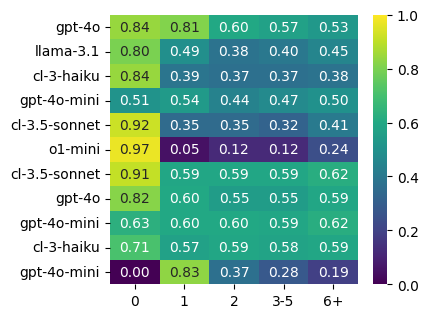

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from epbench.src.results.average_groups import extract_groups
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, ListedColormap
from warnings import catch_warnings, filterwarnings

from epbench.src.results.heatmaps import get_short_name2


def plot_clust0(df, nb_events, relative_to, figsize=(16, 20), only_bins = None):
    with catch_warnings():
        filterwarnings('ignore')
        
        df_results = extract_groups(df, nb_events, relative_to)

        df_results = df_results[df_results['get'] == 'all']
        if only_bins is not None:
            df_results = df_results[df_results['bins_items_correct_answer'].isin(only_bins)]


        data = df_results.loc[:, df_results.columns != 'count']


        data['bins_items_correct_answer'] = pd.Categorical(data['bins_items_correct_answer'], ['0', '1', '2', '3-5', '6+'])

        data.columns = [get_short_name2(x) for x in data.columns]
        
        print(data.columns)

        data = data[['get', 'bins_items_correct_answer', 
                    'gpt-4o', 'llama-3.1', 'cl-3-haiku', 'gpt-4o-mini', 'cl-3.5-sonnet', 'o1-mini',
                    ###
                    'cl-3.5-sonnet\n(rag)', 'gpt-4o\n(rag)', 'gpt-4o-mini\n(rag)', 'cl-3-haiku\n(rag)', 
                    'gpt-4o-mini\n(ftuning)']]
        
        data.columns = ['get', 'bins_items_correct_answer', 
                    'gpt-4o', 'llama-3.1', 'cl-3-haiku', 'gpt-4o-mini', 'cl-3.5-sonnet', 'o1-mini',
                    'cl-3.5-sonnet', 'gpt-4o', 'gpt-4o-mini', 'cl-3-haiku', 
                    'gpt-4o-mini']
                    #'cl-3.5-sonnet', 'gpt-4o', 'gpt-4o-mini', 'cl-3-haiku', 
                    #'gpt-4o-mini']]

        # data.index = data.apply(lambda row: (row[relative_to]), axis=1)
        #data.index = data['cue']
        #data = data.drop('cue', axis = 1)
        for col in reversed(relative_to):
            data = data.sort_values(by=col, ascending=True)
            data = data.loc[:, data.columns != col]

        plt.figure(figsize=figsize)

        my_colors = ['darkred', 'red', 'orange', 'green', 'white']
        my_cmap = ListedColormap(my_colors)
        bounds = [-1, 0.49999, 0.69, 0.80, 0.90, 1]
        my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

        def remove_second_part(x):
            return round(float(x.split("±")[0]), 2) # rounding one digit!
        data = data.applymap(remove_second_part)

        return data


    
def plot_clust1(data, nb_events, relative_to, figsize=(16, 20), only_bins = None):
    
    plt.figure(figsize=figsize)
    
    legend = False
    if only_bins[0] == '2':
        legend = True

    #colors = [(0.8, 0.1, 0.1),         # Red at 0.2
    #          (0.6, 0.1, 0.1),         # Reddish until 0.5
    #          (1, 172/255, 28/255),    # Light gray as transition rgb(255, 172, 28)
    #          (0.1, 0.6, 0.1),         # Green start at 0.7
    #          (0.1, 0.8, 0.1)]         # Darker green at 1.0
    
    colors = [
        (68/255, 1/255, 84/255),
        (72/255, 36/255, 117/255),
        (65/255, 68/255, 135/255),
        (53/255, 95/255, 141/255),
        (42/255, 120/255, 142/255),
        (33/255, 145/255, 140/255),
        (34/255, 168/255, 132/255),
        (68/255, 191/255, 112/255),
        (122/255, 209/255, 81/255),
        (189/255, 223/255, 38/255),
        (253/255, 231/255, 37/255)]
    
    positions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    # Position of each color on the colormap (0 to 1)
    #positions = [0, 0.5, 0.6, 0.7, 1.0]

    # Create the custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom", list(zip(positions, colors)))

    # Your data plotting
    # Assuming 'data' is your input data
    #my_plot = sns.heatmap(data, 
    #                    annot=True, 
    #                    fmt='.1f', 
    #                    cmap=custom_cmap, 
    #                    cbar=legend)

    #my_plot = sns.heatmap(data, cmap=my_cmap, yticklabels=True, xticklabels=True, cbar_kws={'label': 'Value'}, norm=my_norm)
    my_plot = sns.heatmap(data, annot=True, fmt='.2f', cmap=custom_cmap, cbar=legend, vmin=0, vmax=1) # 'RdYlGn'
    fig = my_plot.get_figure()
    #plt.yticks(rotation=90) 
    #plt.title(f'Bin {only_bins[0]}', fontsize = 12) 

    #if only_bins[0] != '0':
    #    #plt.xticks([])
    #    plt.yticks([])
    #    plt.ylabel(None)
    #    #plt.gca().get_legend().remove()
            
    return fig
    
data = []
nb_events = 200
relative_to = ['get', 'bins_items_correct_answer']
for bin in ['0', '1', '2', '3-5', '6+']:
    if bin == '2':
        figsize = (5, 2)
    else:
        figsize=(4.5, 2)
    data.append(plot_clust0(df, nb_events, relative_to, figsize=figsize, only_bins = [bin]))
    # fig.savefig(Path(git_repo_filepath) / 'epbench' / 'plots' / f'heatmap_{bin}_poster.pdf', bbox_inches='tight') 


data = pd.concat(data, axis = 0)
data.index = ['0', '1', '2', '3-5', '6+']
data = data.transpose()
data

figsize=(4, 3.5)
bin = '2'
fig = plot_clust1(data, nb_events, relative_to, figsize=figsize, only_bins = [bin])
fig


fig.savefig(Path(git_repo_filepath) / 'epbench' / 'plots' / f'heatmap_poster.pdf', bbox_inches='tight') 

